# Project: Wrangling and Analyze Data

In [142]:
#Importing packages
# Import libraries
import pandas as pd
import numpy as np
import re #regex replacement
import requests #To download image_predicrtions from the provided url
import os #Check if file was downloaded or not

In [130]:
#For convenience and aesthetic reasons, warnings will be eliminated
import warnings
warnings.filterwarnings('ignore')

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [143]:
twitter_en = pd.read_csv('twitter-archive-enhanced.csv')
twitter_en.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None  
2                  10   Archie  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
pred = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(pred)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# Verify if the file was downloaded or not
os.listdir()

['twitter-archive-enhanced.csv',
 'act_report.ipynb',
 '.ipynb_checkpoints',
 'wrangle_report.ipynb',
 'image_predictions.tsv',
 'wrangle_act.ipynb']

In [145]:
image_pred = pd.read_csv('./image_predictions.tsv', sep='\t')
image_pred.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
import tweepy
import json
from timeit import default_timer as timer


In [7]:
# API Keys, Secrets and Tokens
consumer_key = "5nEjCdeoTkQ********************************"
consumer_secret = "zPms0sQS1u1zeXZb82Fp********************"
access_token = "11562154512244146178-9*********************"
access_secret = "vuTGQ5Co3kBFAoIb69PcB*********************"

In [21]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
#The wait on rate limit is set to true because the rate of fetching twitter allows is 900 per 15 minutes
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [22]:
#Now we should store the twitter id values in tweet_idlist because we're going to 
#iterate through them to fetch data using the Twitter's API 
tweet_ids = twitter_en.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [25]:
#This is exactly when everything went wrong. I will make this matter clearer when I send the project.
#I even tried a method where I added df_list append data frame
#to fetch the data and construct the data frame at the same time!
#BUT IT WOULDN'T WORK!!! at this point I don't really know what's wrong 
#with my code
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
654: 792050063153438720
Fail
655: 791821351946420224
Fail
656: 791784077045166082
Fail
657: 791780927877898241
Fail
658: 791774931465953280
Fail
659: 791672322847637504
Fail
660: 791406955684368384
Fail
661: 791312159183634433
Fail
662: 791026214425268224
Fail
663: 790987426131050500
Fail
664: 790946055508652032
Fail
665: 790723298204217344
Fail
666: 790698755171364864
Fail
667: 790581949425475584
Fail
668: 790337589677002753
Fail
669: 790277117346975746
Fail
670: 790227638568808452
Fail
671: 789986466051088384
Fail
672: 789960241177853952
Fail
673: 789903600034189313
Fail
674: 789628658055020548
Fail
675: 789599242079838210
Fail
676: 789530877013393408
Fail
677: 789314372632018944
Fail
678: 789280767834746880
Fail
679: 789268448748703744
Fail
680: 789137962068021249
Fail
681: 788908386943430656
Fail
682: 788765914992902144
Fail
683: 788552643979468800
Fail
684: 788412144018661376
Fail
685: 788178268662984705
Fail
686: 788150585577050112
Fail
687: 788070120937619456
Fail
688: 7880

Fail
938: 753298634498793472
Fail
939: 753294487569522689
Fail
940: 753039830821511168
Fail
941: 753026973505581056
Fail
942: 752932432744185856
Fail
943: 752917284578922496
Fail
944: 752701944171524096
Fail
945: 752682090207055872
Fail
946: 752660715232722944
Fail
947: 752568224206688256
Fail
948: 752519690950500352
Fail
949: 752334515931054080
Fail
950: 752309394570878976
Fail
951: 752173152931807232
Fail
952: 751950017322246144
Fail
953: 751937170840121344
Fail
954: 751830394383790080
Fail
955: 751793661361422336
Fail
956: 751598357617971201
Fail
957: 751583847268179968
Fail
958: 751538714308972544
Fail
959: 751456908746354688
Fail
960: 751251247299190784
Fail
961: 751205363882532864
Fail
962: 751132876104687617
Fail
963: 750868782890057730
Fail
964: 750719632563142656
Fail
965: 750506206503038976
Fail
966: 750429297815552001
Fail
967: 750383411068534784
Fail
968: 750381685133418496
Fail
969: 750147208377409536
Fail
970: 750132105863102464
Fail
971: 750117059602808832
Fail
972: 7501

Fail
1214: 715220193576927233
Fail
1215: 715200624753819648
Fail
1216: 715009755312439296
Fail
1217: 714982300363173890
Fail
1218: 714962719905021952
Fail
1219: 714957620017307648
Fail
1220: 714631576617938945
Fail
1221: 714606013974974464
Fail
1222: 714485234495041536
Fail
1223: 714258258790387713
Fail
1224: 714251586676113411
Fail
1225: 714214115368108032
Fail
1226: 714141408463036416
Fail
1227: 713919462244790272
Fail
1228: 713909862279876608
Fail
1229: 713900603437621249
Fail
1230: 713761197720473600
Fail
1231: 713411074226274305
Fail
1232: 713177543487135744
Fail
1233: 713175907180089344
Fail
1234: 712809025985978368
Fail
1235: 712717840512598017
Fail
1236: 712668654853337088
Fail
1237: 712438159032893441
Fail
1238: 712309440758808576
Fail
1239: 712097430750289920
Fail
1240: 712092745624633345
Fail
1241: 712085617388212225
Fail
1242: 712065007010385924
Fail
1243: 711998809858043904
Fail
1244: 711968124745228288
Fail
1245: 711743778164514816
Fail
1246: 711732680602345472
Fail
1247:

Fail
1489: 692919143163629568
Fail
1490: 692905862751522816
Fail
1491: 692901601640583168
Fail
1492: 692894228850999298
Fail
1493: 692828166163931137
Fail
1494: 692752401762250755
Fail
1495: 692568918515392513
Fail
1496: 692535307825213440
Fail
1497: 692530551048294401
Fail
1498: 692423280028966913
Fail
1499: 692417313023332352
Fail
1500: 692187005137076224
Fail
1501: 692158366030913536
Fail
1502: 692142790915014657
Fail
1503: 692041934689402880
Fail
1504: 692017291282812928
Fail
1505: 691820333922455552
Fail
1506: 691793053716221953
Fail
1507: 691756958957883396
Fail
1508: 691675652215414786
Fail
1509: 691483041324204033
Fail
1510: 691459709405118465
Fail
1511: 691444869282295808
Fail
1512: 691416866452082688
Fail
1513: 691321916024623104
Fail
1514: 691096613310316544
Fail
1515: 691090071332753408
Fail
1516: 690989312272396288
Fail
1517: 690959652130045952
Fail
1518: 690938899477221376
Fail
1519: 690932576555528194
Fail
1520: 690735892932222976
Fail
1521: 690728923253055490
Fail
1522:

Fail
1764: 678446151570427904
Fail
1765: 678424312106393600
Fail
1766: 678410210315247616
Fail
1767: 678399652199309312
Fail
1768: 678396796259975168
Fail
1769: 678389028614488064
Fail
1770: 678380236862578688
Fail
1771: 678341075375947776
Fail
1772: 678334497360859136
Fail
1773: 678278586130948096
Fail
1774: 678255464182861824
Fail
1775: 678023323247357953
Fail
1776: 678021115718029313
Fail
1777: 677961670166224897
Fail
1778: 677918531514703872
Fail
1779: 677895101218201600
Fail
1780: 677716515794329600
Fail
1781: 677700003327029250
Fail
1782: 677698403548192770
Fail
1783: 677687604918272002
Fail
1784: 677673981332312066
Fail
1785: 677662372920729601
Fail
1786: 677644091929329666
Fail
1787: 677573743309385728
Fail
1788: 677565715327688705
Fail
1789: 677557565589463040
Fail
1790: 677547928504967168
Fail
1791: 677530072887205888
Fail
1792: 677335745548390400
Fail
1793: 677334615166730240
Fail
1794: 677331501395156992
Fail
1795: 677328882937298944
Fail
1796: 677314812125323265
Fail
1797:

Fail
2038: 671561002136281088
Fail
2039: 671550332464455680
Fail
2040: 671547767500775424
Fail
2041: 671544874165002241
Fail
2042: 671542985629241344
Fail
2043: 671538301157904385
Fail
2044: 671536543010570240
Fail
2045: 671533943490011136
Fail
2046: 671528761649688577
Fail
2047: 671520732782923777
Fail
2048: 671518598289059840
Fail
2049: 671511350426865664
Fail
2050: 671504605491109889
Fail
2051: 671497587707535361
Fail
2052: 671488513339211776
Fail
2053: 671486386088865792
Fail
2054: 671485057807351808
Fail
2055: 671390180817915904
Fail
2056: 671362598324076544
Fail
2057: 671357843010908160
Fail
2058: 671355857343524864
Fail
2059: 671347597085433856
Fail
2060: 671186162933985280
Fail
2061: 671182547775299584
Fail
2062: 671166507850801152
Fail
2063: 671163268581498880
Fail
2064: 671159727754231808
Fail
2065: 671154572044468225
Fail
2066: 671151324042559489
Fail
2067: 671147085991960577
Fail
2068: 671141549288370177
Fail
2069: 671138694582165504
Fail
2070: 671134062904504320
Fail
2071:

Fail
2313: 666776908487630848
Fail
2314: 666739327293083650
Fail
2315: 666701168228331520
Fail
2316: 666691418707132416
Fail
2317: 666649482315059201
Fail
2318: 666644823164719104
Fail
2319: 666454714377183233
Fail
2320: 666447344410484738
Fail
2321: 666437273139982337
Fail
2322: 666435652385423360
Fail
2323: 666430724426358785
Fail
2324: 666428276349472768
Fail
2325: 666421158376562688
Fail
2326: 666418789513326592
Fail
2327: 666411507551481857
Fail
2328: 666407126856765440
Fail
2329: 666396247373291520
Fail
2330: 666373753744588802
Fail
2331: 666362758909284353
Fail
2332: 666353288456101888
Fail
2333: 666345417576210432
Fail
2334: 666337882303524864
Fail
2335: 666293911632134144
Fail
2336: 666287406224695296
Fail
2337: 666273097616637952
Fail
2338: 666268910803644416
Fail
2339: 666104133288665088
Fail
2340: 666102155909144576
Fail
2341: 666099513787052032
Fail
2342: 666094000022159362
Fail
2343: 666082916733198337
Fail
2344: 666073100786774016
Fail
2345: 666071193221509120
Fail
2346:

#### I even searched on github for other methods, got inspired and wrote this code from scratch, but all my efforts in vain. I am 100% that my API credentials are accurate, and that I implemented the code correctly; I am really confused. It took a lot more and mental efforts than what it actually needs.

In [33]:
#Available Tweets
tweet_json = []
# Deleted Tweets
e_list = []
################# 
with open('tweet_json.txt', 'w') as outfile:

    for id in tweet_ids:
        try:
            page = api.get_status(id, tweet_mode='extended')
            print("works")
            fav_count = page['favorite_count']
            retweet_count = page['retweet_count']
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            df_list.append({'tweet_id': int(id),
                        'favorites': int(fav_count),
                        'retweet_count': int(retweet_count)})
    
        except tweepy.TweepError as e:
            print("Fail")
            pass
            e_list.append(id)

Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail


Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail
Fail


In [34]:
#The idea was to test whether the data I was fetching was successfully imported or not
#Since Fail is the only result I have it's useless to do this
#tweet_json = pd.DataFrame(json_data, columns = ['tweet_id', 'favorites', 'retweet_count'])

#### Since the tweepy did not work for me, I uploaded the tweet_json.txt to start working with it before the deadline, I've been trying to made this work from 24th of August.

In [26]:
os.listdir()

['twitter-archive-enhanced.csv',
 'act_report.ipynb',
 'tweet_json.txt',
 '.ipynb_checkpoints',
 'wrangle_act-Copy1.ipynb',
 'wrangle_report.ipynb',
 'image_predictions.tsv',
 'wrangle_act.ipynb']

In [7]:
#We first need to initiate an empty array to add the columns we need
selected_col = []

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        
        selected_col.append({
            'tweet_id': json_data['id'],
            'retweet_count': json_data['retweet_count'],
            'favorite_count': json_data['favorite_count']
        })
        
        
# Save all selected attributes in another dataframe
twitter_json = pd.DataFrame(selected_col, columns = [
    'tweet_id', 'retweet_count','favorite_count' ])

twitter_json.head()        

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [8]:
twitter_json.to_csv('twitter_json1.csv', index=False)

In [146]:
twitter_json = pd.read_csv('twitter_json1.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### In this section, we're going to assess data visually using this Jupyter notebook as well as external softwares ( google sheets ) and programatically using Python's predefined pandas' functions. 8 data qualities issues and 2 tidiness issues must be found within our gathered data.


In [7]:
twitter_en 

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [12]:
image_pred 

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [13]:
twitter_json 

tweet_id  retweet_count  favorite_count
0     892420643555336193           8853           39467
1     892177421306343426           6514           33819
2     891815181378084864           4328           25461
3     891689557279858688           8964           42908
4     891327558926688256           9774           41048
5     891087950875897856           3261           20562
6     890971913173991426           2158           12041
7     890729181411237888          16716           56848
8     890609185150312448           4429           28226
9     890240255349198849           7711           32467
10    890006608113172480           7624           31166
11    889880896479866881           5156           28268
12    889665388333682689           8538           38818
13    889638837579907072           4735           27672
14    889531135344209921           2321           15359
15    889278841981685760           5637           25652
16    888917238123831296           4709           29611
17    888804989199671297           4559           26080
18    888554962724278272           3732           20290
19    888078434458587136           3653           22201
20    887705289381826560           5609           30779
21    887517139158093824          12082           46959
22    887473957103951883          18781           69871
23    887343217045368832          10737           34222
24    887101392804085760           6167           31061
25    886983233522544640           8084           35859
26    886736880519319552           3443           12306
27    886680336477933568           4610           22798
28    886366144734445568           3316           21524
29    886267009285017600              4             117
...                  ...            ...             ...
2324  666411507551481857            339             459
2325  666407126856765440             44             113
2326  666396247373291520             92             172
2327  666373753744588802            100             194
2328  666362758909284353            595             804
2329  666353288456101888             77             229
2330  666345417576210432            146             307
2331  666337882303524864             96             204
2332  666293911632134144            368             522
2333  666287406224695296             71             152
2334  666273097616637952             82             184
2335  666268910803644416             37             108
2336  666104133288665088           6871           14765
2337  666102155909144576             16              81
2338  666099513787052032             73             164
2339  666094000022159362             79             169
2340  666082916733198337             47             121
2341  666073100786774016            174             335
2342  666071193221509120             67             154
2343  666063827256086533            232             496
2344  666058600524156928             61             115
2345  666057090499244032            146             304
2346  666055525042405380            261             448
2347  666051853826850816            879            1253
2348  666050758794694657             60             136
2349  666049248165822465             41             111
2350  666044226329800704            147             311
2351  666033412701032449             47             128
2352  666029285002620928             48             132
2353  666020888022790149            532            2535

[2354 rows x 3 columns]

In [15]:
twitter_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
twitter_en.shape

(2356, 17)

In [16]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
image_pred.shape
#2075 tweet include images

(2075, 12)

In [17]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [7]:
twitter_json.shape

(2354, 3)

#### Further exploring our datasets

In [26]:
twitter_en['name'].value_counts()
#None should rather be turned to NaN

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Tucker           10
Penny            10
Lola             10
Winston           9
Bo                9
Sadie             8
the               8
Bailey            7
Buddy             7
Toby              7
Daisy             7
an                7
Bella             6
Rusty             6
Jax               6
Oscar             6
Koda              6
Jack              6
Stanley           6
Scout             6
Leo               6
Dave              6
Milo              6
Sunny             5
               ... 
Rodman            1
Emanuel           1
Pavlov            1
Alexanderson      1
Willy             1
Ace               1
officially        1
Scruffers         1
Spencer           1
Maxwell           1
Molly             1
Philippe          1
Tuck              1
Comet             1
Zeek              1
Rorie             1
Gunner            1
Kona              1
Gerbald           1


In [28]:
twitter_en['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [6]:
twitter_en['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
5       <a href="http://twitter.com/download/iphone" r...
6       <a href="http://twitter.com/download/iphone" r...
7       <a href="http://twitter.com/download/iphone" r...
8       <a href="http://twitter.com/download/iphone" r...
9       <a href="http://twitter.com/download/iphone" r...
10      <a href="http://twitter.com/download/iphone" r...
11      <a href="http://twitter.com/download/iphone" r...
12      <a href="http://twitter.com/download/iphone" r...
13      <a href="http://twitter.com/download/iphone" r...
14      <a href="http://twitter.com/download/iphone" r...
15      <a href="http://twitter.com/download/iphone" r...
16      <a href="http://twitter.com/download/iphone" r...
17      <a hre

In [19]:
twitter_en['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

### Quality issues

1. #### "You do not need to gather the tweets beyond August 1st, 2017." tweets after this date must be removed.

2. #### timestamp is to be converted to  datetime format

3. #### Tweet_id, retweeted_status_id ,retweeted_status_user_id need to be string for later uses.

4. #### Some expanded_urls contain a gofundme link, we're going to delete only the gofundme link and leave the twitter link using regex. ( I used stackoverflow to help me solve this matter, I think it is allowed since the object of the thread aligns perfectly with our case use and it is public which implies the consent of the person that replied   <a href="https://stackoverflow.com/questions/52138306/python-extracting-urls-using-regex-or-other-means" rel="nofollow">Stackoverflow</a> )

5. #### in the source column, the source of the tweet is not displayed directly, it is hidden within a html tag, we need to extract it.

6. #### "You only want original ratings (no retweets) that have images." We should only keep original ratings that include images.

7. #### Some dog names are either incorrect or inexsistant, we should label them under unknown or inexistent.

8. #### p1_dog, p2_dog, p3_dog indicate whether it's a dog or not through a boolean variable. We will only keep those that diplay a dog's image meaning at least one of those three returns a TRUE statement. We will use 'or, |' as taught in our weekly sessions.

9. #### In image pred p1, p2, and p3 must be edited in a way that all values start with an uppercase.

10. #### In image tweet_id must be converted to string

11. #### Drop unnecessary columns whenver we see fit in each dataset

12. #### p1, p2, p3 ought to be renamed to be meaningful and mean prediction.


### Tidiness issues


1. #### The 4 columns depicting the dog stage (doggo, floofer, pupper, puppo) should be reduced to one single column to ease visualization. 


2. #### The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate), and thus we will merge all datasets at the end.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [173]:
# Make copies of original pieces of data
twitter_en_clean = twitter_en.copy()
image_pred_clean = image_pred.copy()
twitter_json_clean = twitter_json.copy()

## Quality issues

### Issue #1:

#### Define:

> #### You do not need to gather the tweets beyond August 1st, 2017." tweets after this date must be removed.

#### Code

In [179]:
twitter_en_clean['timestamp'] = twitter_en_clean[twitter_en_clean['timestamp'] <= '2017-08-01']

#### Test

In [133]:
twitter_en_clean[twitter_en_clean.timestamp >= '2017-08-01']

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

### Issue #2:

#### Define

> timestamp is string, it needs to be converted to datetime format for later uses.

In [180]:
twitter_en_clean['timestamp'] = pd.to_datetime(twitter_en_clean['timestamp'])

In [181]:
twitter_en_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2092 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns](1), float

### Issue #3

#### Define

> #### Tweet_id, expanded_urls, retweeted_status_id ,retweeted_status_user_id need to be string for later uses in cleaning.

#### Code

In [182]:
twitter_en_clean['tweet_id'] = twitter_en_clean['tweet_id'].astype(str)
twitter_en_clean['expanded_urls'] = twitter_en_clean['expanded_urls'].astype(str)
twitter_en_clean['retweeted_status_id'] = twitter_en_clean['retweeted_status_id'].astype(str)
twitter_en_clean['retweeted_status_user_id'] = twitter_en_clean['retweeted_status_user_id'].astype(str)



#### Test

In [183]:
twitter_en_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 17 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2092 non-null datetime64[ns]
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           2094 non-null object
retweeted_status_user_id      2094 non-null object
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: datetime64[ns](1), 

### Issue #4:

#### Define

> #### Some expanded_urls contain a gofundme link, we're going to delete only the gofundme link and leave the twitter link using regex. ( I used stackoverflow to help me solve this matter, I think it is allowed since the object of the thread aligns perfectly with our case use and it is public which implies the consent of the person that replied.   <a href="https://stackoverflow.com/questions/52138306/python-extracting-urls-using-regex-or-other-means" rel="nofollow">Stackoverflow</a> )


#### Code

In [184]:
twitter_en_clean['expanded_urls'] = twitter_en_clean['expanded_urls'].str.findall(r"https?:\/\/twitter\.com[^,]+(?<=\/\d$)").str[0]


#### Test

In [137]:
twitter_en_clean['expanded_urls']


0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://twitter.com/dog_rates/status/890971913...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

### Issue #5:

#### Define

> #### in the source column, the source of the tweet whether it was posted from an iPhone or another device is not displayed directly, it is hidden within a html tag, we need to extract it.

In [185]:
twitter_en_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### We have exactly 4 sources from where tweets were posted, in order to have meaningful analysis later, it is better to make each source displayed correctly. To make this happen, we have to replace each html string by the name of the source. For instance `<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>`  is to be replaced by Twitter for iPhone.

In [186]:
#We will assign each html to a new variable to ease the replacing code
iphone = '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
vine = '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
web_client = '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
tweetdeck = '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'

In [187]:
#using the variables created above in the replace function
twitter_en_clean.source = twitter_en_clean.source.replace(iphone, 'Twitter for iPhone')
twitter_en_clean.source = twitter_en_clean.source .replace(vine, 'Vine - Make a Scene')
twitter_en_clean.source = twitter_en_clean.source.replace(web_client, 'Twitter Web Client')
twitter_en_clean.source = twitter_en_clean.source .replace(tweetdeck, 'TweetDeck')

#### Test

In [188]:
twitter_en_clean['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Issue #6:

#### Define

> #### "You only want original ratings (no retweets) that have images." We should only keep original ratings that include images.
> #### This operation must be broken down into 2 steps: The first step is to remove all rows where `retweeted_status_id` and `in_reply_to_status_id` are not null, because those two indicate that a tweet is not original. The second step is to only extract those with an image

#### Code

In [174]:
#Reminder that those columns will be dropped later
twitter_en_clean = twitter_en_clean[twitter_en_clean.retweeted_status_id.isnull()]
twitter_en_clean = twitter_en_clean[twitter_en_clean.in_reply_to_status_id.isnull()]
#We should reset the index otherwise it will return an empty dataframe
twitter_en_clean.reset_index(drop = True, inplace = True)


#### `expanded_urls` : Links ot the media display page. This column could be exploited to check which columns display images.

In [175]:
twitter_en_clean = twitter_en_clean[twitter_en_clean.expanded_urls.notnull()]
# Reset index
twitter_en_clean.reset_index(drop = True, inplace = True)

#### Test

In [176]:
#Test1
twitter_en_clean.in_reply_to_status_id.unique() , twitter_en_clean.retweeted_status_id.unique()

(array([ nan]), array([ nan]))

In [177]:
#Test2
twitter_en_clean.expanded_urls.isnull().sum()

0

In [178]:
twitter_en_clean.shape

(2094, 17)

### Issue #7:

#### Define

#### Some dog names are either incorrect or inexsistant, we should label them under the tag unknown or inexistent.

#### Code

In [189]:
#We should first display the list of innacurate names. PS: they all start with a lowercase.
inacc = list(twitter_en_clean[twitter_en_clean.name.str.islower()].name.value_counts().index)
inacc.append('None')

In [142]:
print(inacc)

['a', 'the', 'an', 'very', 'one', 'quite', 'just', 'actually', 'not', 'getting', 'space', 'mad', 'all', 'my', 'by', 'this', 'life', 'incredibly', 'officially', 'such', 'unacceptable', 'his', 'light', 'old', 'infuriating', 'None']


In [190]:
#Replacing the nones and innacurate names with "unknown"
twitter_en_clean.name.replace('None', 'Unknown', inplace = True)

In [191]:
for i in inacc : 
    twitter_en_clean.name.replace(i, 'Unknown', inplace = True)

In [192]:
#Let's make sure all the names start with an uppercasse
twitter_en_clean.name = twitter_en_clean.name.str.capitalize()

#### Test

In [146]:
#Test
for i in inacc:
    assert i not in twitter_en_clean.name.values

In [147]:
twitter_en_clean.name.value_counts()

Unknown      704
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
Daisy          7
Toby           7
Jax            6
Stanley        6
Bo             6
Bailey         6
Bella          6
Oscar          6
Koda           6
Leo            5
Dave           5
Milo           5
Buddy          5
Rusty          5
Louis          5
Bentley        5
Chester        5
Scout          5
Dexter         4
Chip           4
            ... 
Jebberson      1
Cermet         1
Sojourner      1
Harvey         1
Anna           1
Jd             1
Meyer          1
Mya            1
Dawn           1
Hazel          1
Arlen          1
Ember          1
Nugget         1
Henry          1
Traviss        1
Doobert        1
Hall           1
Dale           1
Barry          1
Shikha         1
Malikai        1
Mairi          1
Kaia           1
Ralphé         1
Pubert         1
Bobbay         1
Canela         1
Livvie        

### Issue #8

#### Define

> #### p1_dog, p2_dog, p3_dog indicate whether it's a dog or not through a boolean variable. We will only keep those that diplay a dog's image meaning at least one of those three returns a TRUE statement. We will use 'or, |' as taught in our weekly sessions.

#### Code

In [193]:
image_pred_clean = image_pred_clean[(image_pred_clean['p1_dog'] == True) | (image_pred_clean['p2_dog'] == True) | (image_pred_clean['p3_dog'] == True)]


#### Test

In [194]:
image_pred_clean[(image_pred_clean['p1_dog'] == False) & (image_pred_clean['p2_dog'] == False) & (image_pred_clean['p3_dog'] == False)]

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

### Issue #9:

#### Define

#### In image pred p1, p2, and p3 refer to the prediction of the dog's race , upong detailed examinations, turns out some predictions start with a lower case whilist other start with an uppercase. This columns must be edited in a way that all values start with an uppercase.

#### Code

In [195]:
image_pred_clean.p1 = image_pred_clean.p1.str.capitalize()
image_pred_clean.p2 = image_pred_clean.p2.str.capitalize()
image_pred_clean.p3 = image_pred_clean.p3.str.capitalize()

#### Test

In [59]:
image_pred_clean['p1'], image_pred_clean['p2'], image_pred_clean['p3']

(0            Welsh_springer_spaniel
 1                           Redbone
 2                   German_shepherd
 3               Rhodesian_ridgeback
 4                Miniature_pinscher
 5              Bernese_mountain_dog
 7                              Chow
 8                     Shopping_cart
 9                  Miniature_poodle
 10                 Golden_retriever
 11                    Gordon_setter
 12                     Walker_hound
 13                              Pug
 14                       Bloodhound
 15                            Lhasa
 16                   English_setter
 19                Italian_greyhound
 20                      Maltese_dog
 22                               Ox
 23                 Golden_retriever
 24                         Malamute
 26      Soft-coated_wheaten_terrier
 27                        Chihuahua
 28          Black-and-tan_coonhound
 30                      Toy_terrier
 31                 Blenheim_spaniel
 32                         Pembroke
 

### Issue #10

#### Define

> #### tweet_id in both `image_pred_clean` and `twitter_json_clean` must be converted to string for a later use.

#### Code

In [196]:
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)
twitter_json_clean['tweet_id'] = twitter_json_clean['tweet_id'].astype(str)

#### Test

In [61]:
image_pred_clean.info(), twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null object
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null object
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null object
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null object
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


(None, None)

### Issue #11:

#### Define

> #### Drop unnecessary columns that won't serve us further in the analysis process

#### Code

In [197]:
twitter_en_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [198]:
twitter_en_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2092 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         1971 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 196.4+ KB


### Issue #12: 


#### Define

> #### p1, p2, p3 ought to be renamed to be meaningful and mean prediction.

#### Code



In [206]:
image_pred_clean.rename(columns = {'p1':'Prediction 1', 'p2':'Prediction 2', 'p3':'Prediction 3'}, inplace = True)

#### Test

In [207]:
image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'Prediction 1', 'p1_conf', 'p1_dog',
       'Prediction 2', 'p2_conf', 'p2_dog', 'Prediction 3', 'p3_conf',
       'p3_dog'],
      dtype='object')

## Tidying Data

### Issue #1:

#### Define

> #### The 4 columns depicting the dog stage (doggo, floofer, pupper, puppo) should be reduced to one single column to ease visualization. The tutorial to this method using group by is <a href="https://www.faqcode4u.com/faq/389534/pandas-group-by-a-column-that-meets-a-condition" rel="nofollow">here</a> 


#### Code

#### First we need to alter all the null and Nan rows and make them empty. Then we will group by those columns. Once done we will append them together in a new column called `dog_stage`

In [199]:
stage_columns = ['doggo', 'floofer', 'pupper', 'puppo'] 
for s in stage_columns:
    twitter_en_clean[s] = twitter_en_clean[s].replace('None', '')
    twitter_en_clean[s] = twitter_en_clean[s].replace(np.NaN, '')

In [200]:
# group by step
twitter_en_clean.groupby(['doggo', 'floofer', 'pupper', 'puppo']).size().reset_index().rename(columns={0: 'count'})

doggo  floofer  pupper  puppo  count
0                                  1759
1                          puppo     23
2                  pupper           220
3         floofer                     9
4  doggo                             72
5  doggo                   puppo      1
6  doggo           pupper             9
7  doggo  floofer                     1

In [201]:
# append dog_stages into a single column
twitter_en_clean['dog_stage'] = twitter_en_clean.doggo + twitter_en_clean.floofer + twitter_en_clean.pupper + twitter_en_clean.puppo

In [202]:
# Drop old columns
twitter_en_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [203]:
twitter_en_clean.dog_stage.value_counts()

                1759
pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

> #### It has come to my attention that we have a "doggopupper", "doggopuppo" and a "doggofloofer", I will drop those rows for convinence reasons.    

In [204]:
twitter_en_clean = twitter_en_clean.drop(twitter_en_clean[(twitter_en_clean.dog_stage ==  'doggopupper') | (twitter_en_clean.dog_stage == 'doggopuppo') | (twitter_en_clean.dog_stage =='doggofloofer')].index)

#### Test

In [205]:
twitter_en_clean.dog_stage.value_counts()

           1759
pupper      220
doggo        72
puppo        23
floofer       9
Name: dog_stage, dtype: int64

#### Test

### Issue #2

#### Define

> #### The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate), and thus we will merge all datasets at the end.

#### Code

In [210]:
twitter_archieve_master = pd.merge(twitter_en_clean, twitter_json_clean, on='tweet_id', how='inner')

In [211]:
twitter_archieve_master = pd.merge(twitter_archieve_master, image_pred_clean, on='tweet_id', how='inner')


#### Test

In [212]:
twitter_archieve_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1656
Data columns (total 22 columns):
tweet_id              1657 non-null object
timestamp             1656 non-null datetime64[ns]
source                1657 non-null object
text                  1657 non-null object
expanded_urls         1657 non-null object
rating_numerator      1657 non-null int64
rating_denominator    1657 non-null int64
name                  1657 non-null object
dog_stage             1657 non-null object
retweet_count         1657 non-null int64
favorite_count        1657 non-null int64
jpg_url               1657 non-null object
img_num               1657 non-null int64
Prediction 1          1657 non-null object
p1_conf               1657 non-null float64
p1_dog                1657 non-null bool
Prediction 2          1657 non-null object
p2_conf               1657 non-null float64
p2_dog                1657 non-null bool
Prediction 3          1657 non-null object
p3_conf               1657 non-n

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [215]:
twitter_archieve_master.to_csv('twitter_archive_master.csv', index = False)

In [216]:
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [119]:
import matplotlib.pyplot as plt


In [120]:
#Setting Style
plt.style.use('fivethirtyeight')

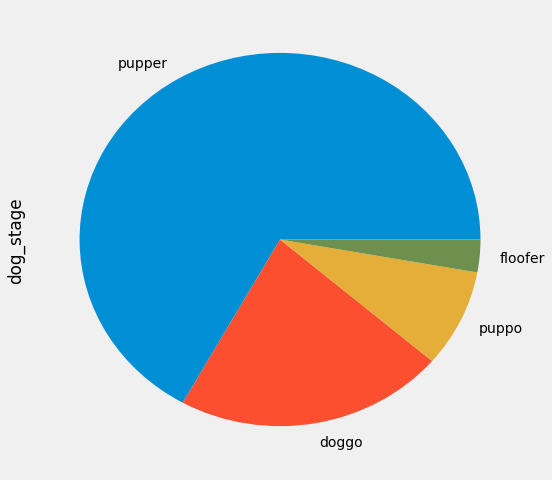

In [123]:
#Pie chart of dog stages
df.dog_stage.value_counts().plot(kind='pie', figsize= (8,8)); #pie chart

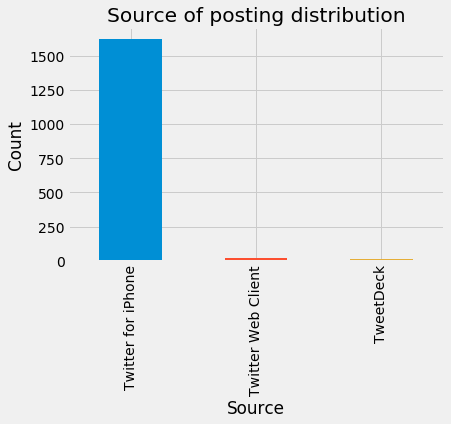

In [125]:
#Distribution of posting source
df.source.value_counts().plot(kind = 'bar')
plt.title('Source of posting distribution')
plt.xlabel('Source')
plt.ylabel('Count');

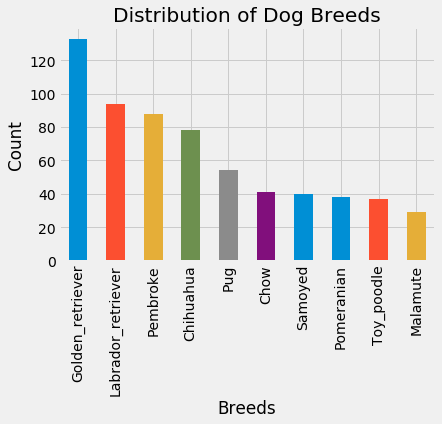

In [129]:
# 10 Most predicted dog breed according to prediction 1.
df['Prediction 1_x'].value_counts()[:10].plot('bar')
plt.title('Distribution of Dog Breeds')
plt.xlabel('Breeds')
plt.ylabel('Count');

### Insights:
1. #### 'Pupper' is the most occurrent dog stage 

2. #### Most tweets were posted from an iPhone

3. #### Golden retriever is the most predicted breed.

### Visualization

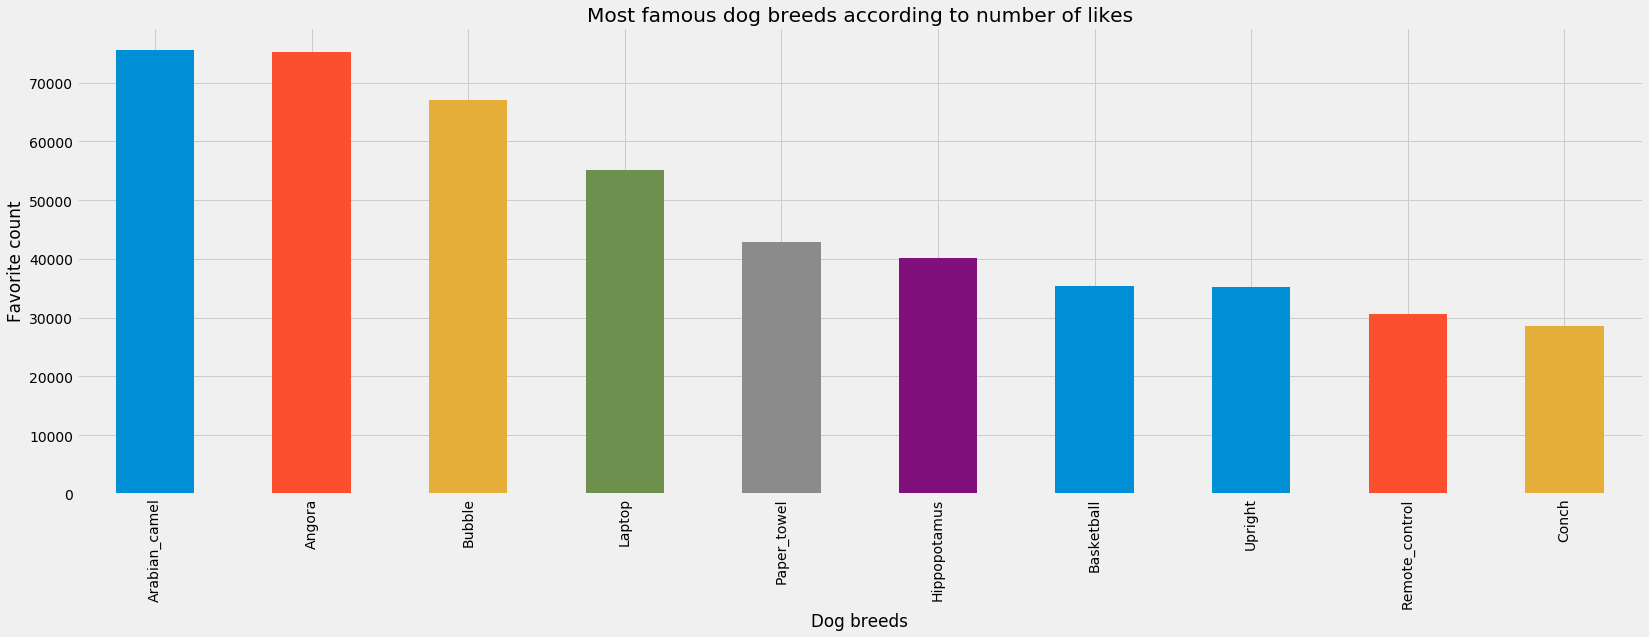

In [140]:
#We will try to find out the 10 most liked breed of dogs according to prediction 1
df.groupby('Prediction 1_x').favorite_count.mean().nlargest(10).plot(kind='bar');
plt.rcParams["figure.figsize"] = (25,8)
plt.title('Most famous dog breeds according to number of likes')
plt.xlabel('Dog breeds')
plt.ylabel('Favorite count');

#### According to Prediction 1, the most loved dog breed is Arabic camel followed by Angora and Bubble.